In [1]:
library(caret)
library(mlbench)

Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'mlbench' was built under R version 3.5.3"

In [2]:
df <- read.csv(file="E:\\1.DATA_ANALYTICS\\17-Analise Preditiva Avançada\\Exercicio_4\\SVM_Exercise.csv", header=TRUE, sep=",")

In [3]:
head(df)

P.E,P.B,EPS,P.S,US,PEG,RATING
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<fct>
10.05,2.03,3.5,1.28,1,0.6440,AAA
1.44,2.80,4.4,1.87,1,0.6210,AAA
11.48,2.80,4.6,1.98,1,0.5635,AAA
12.10,3.43,3.6,2.41,1,0.5980,AAA
4.72,2.24,3.5,1.34,1,0.6325,AAA
13.74,2.73,4.6,2.03,1,0.4140,AAA


In [4]:
set.seed(1422)

trainIndex <- createDataPartition(df$RATING, p = .7, list = FALSE)

dfTrain <- df[ trainIndex,]
dfTest  <- df[-trainIndex,]

Warning message in createDataPartition(df$RATING, p = 0.7, list = FALSE):
"Some classes have a single record ( AA+ ) and these will be selected for the sample"

In [5]:
cv <- trainControl(method = "repeatedcv", number = 10, savePredictions = TRUE)

model_linear <- train(RATING~., data = dfTrain, method = "svmLinear", trControl = cv, 
               preProcess = c("center", "scale"))

model_linear

Support Vector Machines with Linear Kernel 

223 samples
  6 predictor
  8 classes: 'A', 'A-', 'A+', 'AA', 'AA-', 'AA+', 'AAA', 'BB+' 

Pre-processing: centered (6), scaled (6) 
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 200, 202, 200, 201, 202, 201, ... 
Resampling results:

  Accuracy   Kappa    
  0.8141963  0.7500417

Tuning parameter 'C' was held constant at a value of 1

In [6]:
dfPred <- predict(model_linear, newdata=dfTest)
confusionMatrix(data=dfPred, dfTest$RATING)

Confusion Matrix and Statistics

          Reference
Prediction  A A- A+ AA AA- AA+ AAA BB+
       A   20  0  0  3   0   0   0   0
       A-   0  1  0  0   0   0   0   0
       A+   0  0  5  0   0   0   0   0
       AA   2  0  0  3   0   0   0   0
       AA-  0  0  0  0   0   0   0   0
       AA+  0  0  0  0   0   0   0   0
       AAA  1  0  0  1   0   0  41   1
       BB+  0  0  1  0   0   0   1  11

Overall Statistics
                                         
               Accuracy : 0.8901         
                 95% CI : (0.8072, 0.946)
    No Information Rate : 0.4615         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.8398         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: A Class: A- Class: A+ Class: AA Class: AA-
Sensitivity            0.8696   1.00000   0.83333   0.42857         NA
Specificity            0.9559   1.00000   1.00000   0.97619          1
Pos 

ROC curve variable importance

  variables are sorted by maximum importance across the classes
         A     A.   A..1     AA    AA.  AA..1    AAA    BB.
US  1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 0.5357
P.S 0.9848 0.9792 0.9792 0.9815 0.9960 0.9792 0.9792 0.9848
EPS 0.9815 0.9815 0.9815 0.9815 0.9815 0.9815 0.9815 0.9636
P.E 0.8657 0.8725 0.8796 0.9630 0.8657 0.8657 0.8657 0.8725
P.B 0.9372 0.6111 0.6111 0.7407 0.7759 0.9040 0.9375 0.9372
PEG 0.9021 0.5486 0.5741 0.8796 0.7614 0.7883 0.9107 0.9021

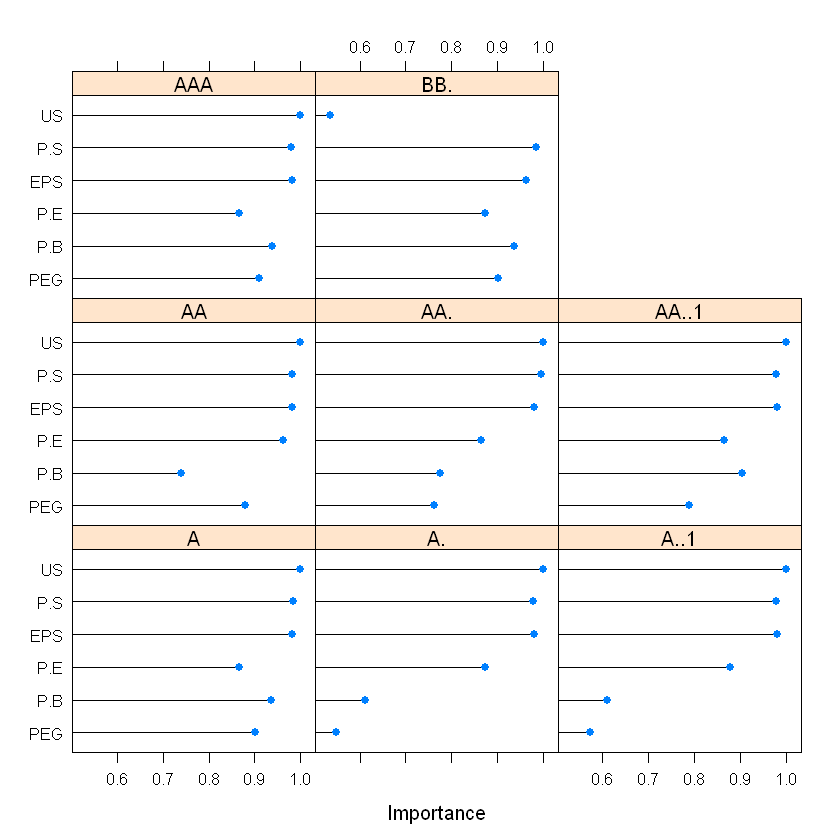

In [7]:
imp <- varImp(model_linear, useModel=FALSE, scale=FALSE)
imp
plot(imp)

In [8]:
cv <- trainControl(method = "repeatedcv", number = 10, savePredictions = TRUE)

model_rd <- train(RATING~., data = dfTrain, method = "svmRadial", trControl = cv, 
               preProcess = c("center", "scale"))

model_rd

Support Vector Machines with Radial Basis Function Kernel 

223 samples
  6 predictor
  8 classes: 'A', 'A-', 'A+', 'AA', 'AA-', 'AA+', 'AAA', 'BB+' 

Pre-processing: centered (6), scaled (6) 
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 200, 202, 200, 202, 201, 199, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.7881423  0.7115826
  0.50  0.8061288  0.7377667
  1.00  0.8376412  0.7858820

Tuning parameter 'sigma' was held constant at a value of 0.3283525
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.3283525 and C = 1.

In [9]:
dfPred <- predict(model_rd, newdata=dfTest)
confusionMatrix(data=dfPred, dfTest$RATING)

Confusion Matrix and Statistics

          Reference
Prediction  A A- A+ AA AA- AA+ AAA BB+
       A   20  0  0  5   0   0   0   0
       A-   0  1  0  0   0   0   0   0
       A+   0  0  6  0   0   0   0   0
       AA   2  0  0  2   0   0   0   0
       AA-  0  0  0  0   0   0   0   0
       AA+  0  0  0  0   0   0   0   0
       AAA  1  0  0  0   0   0  40   1
       BB+  0  0  0  0   0   0   2  11

Overall Statistics
                                         
               Accuracy : 0.8791         
                 95% CI : (0.794, 0.9381)
    No Information Rate : 0.4615         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.825          
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: A Class: A- Class: A+ Class: AA Class: AA-
Sensitivity            0.8696   1.00000   1.00000   0.28571         NA
Specificity            0.9265   1.00000   1.00000   0.97619          1
Pos 

ROC curve variable importance

  variables are sorted by maximum importance across the classes
         A     A.   A..1     AA    AA.  AA..1    AAA    BB.
US  1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 0.5357
P.S 0.9848 0.9792 0.9792 0.9815 0.9960 0.9792 0.9792 0.9848
EPS 0.9815 0.9815 0.9815 0.9815 0.9815 0.9815 0.9815 0.9636
P.E 0.8657 0.8725 0.8796 0.9630 0.8657 0.8657 0.8657 0.8725
P.B 0.9372 0.6111 0.6111 0.7407 0.7759 0.9040 0.9375 0.9372
PEG 0.9021 0.5486 0.5741 0.8796 0.7614 0.7883 0.9107 0.9021

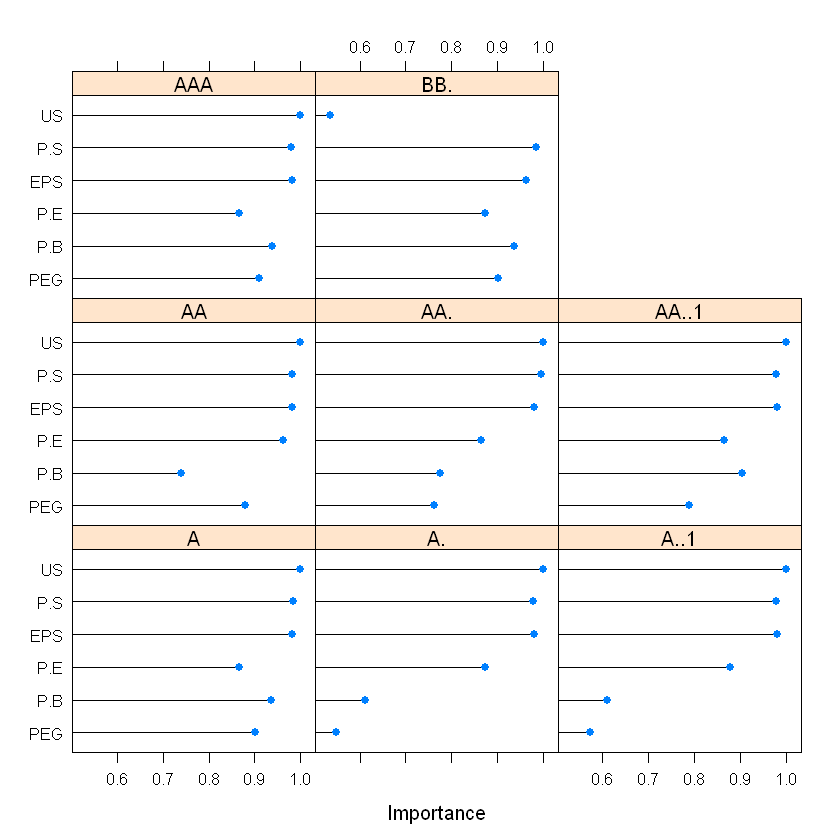

In [10]:
imp <- varImp(model_rd, useModel=FALSE, scale=FALSE)
imp
plot(imp)

In [11]:
apple <- data.frame("P/E"= 15.45, "P/B"= 7.53, "EPS"=12.15 , 
                    "P/S"=3.47 , "US"=1 , "PEG"=1.74)

In [12]:
y_Model <- predict(model_linear, apple)
apple$Model_Linear <- y_Model
head(apple)

P.E,P.B,EPS,P.S,US,PEG,Model_Linear
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
15.45,7.53,12.15,3.47,1,1.74,A+


In [13]:
y_Model <- predict(model_rd, apple)
apple$Model_Radial <- y_Model
head(apple)

P.E,P.B,EPS,P.S,US,PEG,Model_Linear,Model_Radial
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
15.45,7.53,12.15,3.47,1,1.74,A+,A
